In [1]:
import pandas as pd
import numpy
import matplotlib.pylab as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.regressionplots as modelPlot

In [2]:
fluTrends = pd.read_excel('fluTrends.xlsx')
searchTerms = pd.read_excel('searchTerms.xlsx')
for i in range(0,len(searchTerms['Week'])):
	a = searchTerms.iat[i,0]
	a = numpy.datetime64(a[0:a.index(' ')])
	searchTerms.iat[i,0] = a

In [3]:
searchTerms.rename(columns = dict(Week='Date'),inplace=True)

In [4]:
searchTerms.set_index(['Date'],inplace=True)
fluTrends.set_index(['Date'],inplace=True)
fluTrends['Canada'] = fluTrends['Canada'] / max(fluTrends['Canada']) * 100

In [5]:
data = pd.concat([fluTrends['Canada'],searchTerms],axis=1)
data = data.dropna(how='any')

In [8]:
data.head()

,Canada,soreThroat,diarrhea,cough,fever,flu
Date,,,,,,
2004-01-04,37.665153,16.0,0.0,24.0,29.0,3.0
2004-01-11,29.582989,14.0,0.0,29.0,33.0,3.0
2004-01-18,23.018167,14.0,13.0,37.0,46.0,2.0
2004-01-25,22.244013,14.0,13.0,26.0,47.0,4.0
2004-02-01,17.537159,14.0,13.0,15.0,40.0,3.0


In [6]:
model = smf.ols('Canada ~ fever*soreThroat*diarrhea*cough',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Canada   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     97.18
Date:                Fri, 08 Jan 2021   Prob (F-statistic):          1.54e-145
Time:                        17:15:22   Log-Likelihood:                -1950.3
No. Observations:                 582   AIC:                             3933.
Df Residuals:                     566   BIC:                             4003.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                         -21.9084     28.476     -0.769      0.442     -77.840      34.024
fever                              -0.4399      0.689     -0.638      0.524      -1.794       0.914
soreThroat                          1.6494      1.655      0.996      0.319      -1.602       4.901
fever:soreThroat                    0.0225      0.040      0.568      0.570      -0.055       0.100
diarrhea                            1.8029      0.986      1.828      0.068      -0.135       3.741
fever:diarrhea                     -0.0203      0.023     -0.882      0.378      -0.066       0.025
soreThroat:diarrhea                -0.0809      0.042     -1.923      0.055      -0.164       0.002
fever:soreThroat:diarrhea           0.0003      0.001      0.380      0.704      -0.001       0.002
cough                               1.6500      0.855      1.930      0.054      -0.029       3.329
fever:cough                         0.0183      0.019      0.955      0.340      -0.019       0.056
soreThroat:cough                   -0.1007      0.036     -2.800      0.005      -0.171      -0.030
fever:soreThroat:cough              0.0002      0.001      0.311      0.756      -0.001       0.002
diarrhea:cough                     -0.0807      0.022     -3.666      0.000      -0.124      -0.037
fever:diarrhea:cough                0.0007      0.000      1.784      0.075   -7.31e-05       0.002
soreThroat:diarrhea:cough           0.0035      0.001      4.282      0.000       0.002       0.005
fever:soreThroat:diarrhea:cough -2.928e-05    1.3e-05     -2.257      0.024   -5.48e-05    -3.8e-06
==============================================================================
Omnibus:                       81.408   Durbin-Watson:                   0.605
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.945
Skew:                           0.767   Prob(JB):                     8.42e-40
Kurtosis:                       5.251   Cond. No.                     3.21e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.21e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

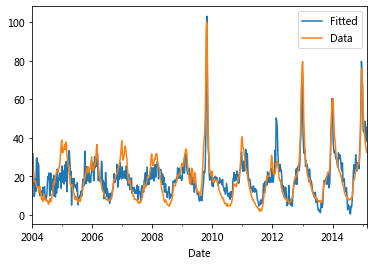

In [7]:
plt.clf()
model.fittedvalues.plot(label='Fitted')
data['Canada'].plot(label='Data')
plt.legend(loc='best')
plt.show() #to show the plot

https://research.google.com/archive/papers/detecting-influenza-epidemics.pdf
